<a href="https://colab.research.google.com/github/DharithriSharma/voiceAssistantForVisuallyBlind/blob/main/Copy_of_ml%2BipFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                                      # linear algebra
import pandas as pd                                     # Data processing, CSV file I/O (e.g. pd.read_csv)

# Plots
import seaborn as sns                                   # importing seaborn for statistical plots
import matplotlib.pyplot as plt                         # matplotlib.pyplot plots data

# Train test split
from sklearn import model_selection
from sklearn.model_selection import train_test_split    # Sklearn package's randomized data splitting function

# Metrics
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from scipy.stats import zscore
from sklearn import preprocessing

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Reading the data as a dataframe
df  = pd.read_csv('predictive_maintenance.csv')

In [ ]:
# Checking the number of rows and columns in the data frame
df.shape

(10000, 10)

In [ ]:
# Displaying the first five records of the dataframe
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df=df.drop(['Product ID','UDI'],axis=1)

In [ ]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [ ]:
df.isnull().values.any()

False

EXPLORATORY  DATA ANALYSIS

In [ ]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [ ]:
df['Target'].unique()

array([0, 1])

In [ ]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

Text(0.5, 1.0, 'Count of Target')

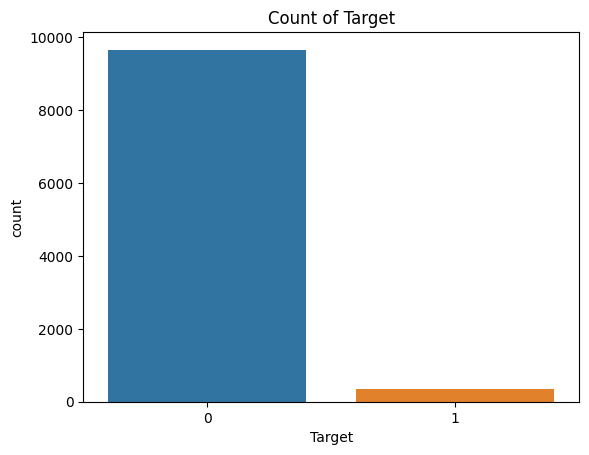

In [ ]:
sns.countplot(x='Target', data=df)
plt.title('Count of Target')

Text(0.5, 1.0, 'Count of Faiure type')

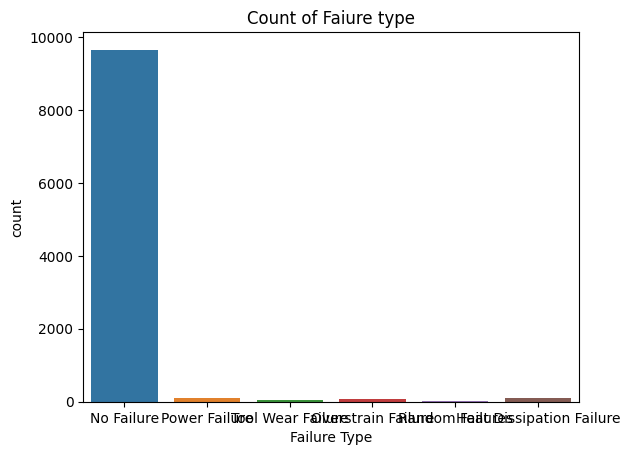

In [ ]:
sns.countplot(x='Failure Type', data=df)
plt.title('Count of Faiure type')

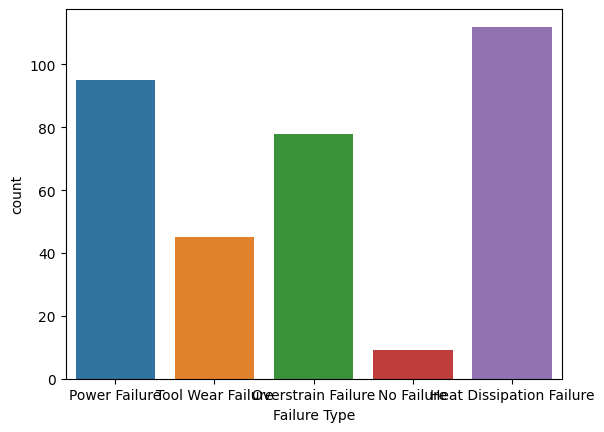

In [ ]:
sns.countplot(data=df[df['Target']==1],x="Failure Type")
sns.set({'figure.figsize':(8.6,3)})

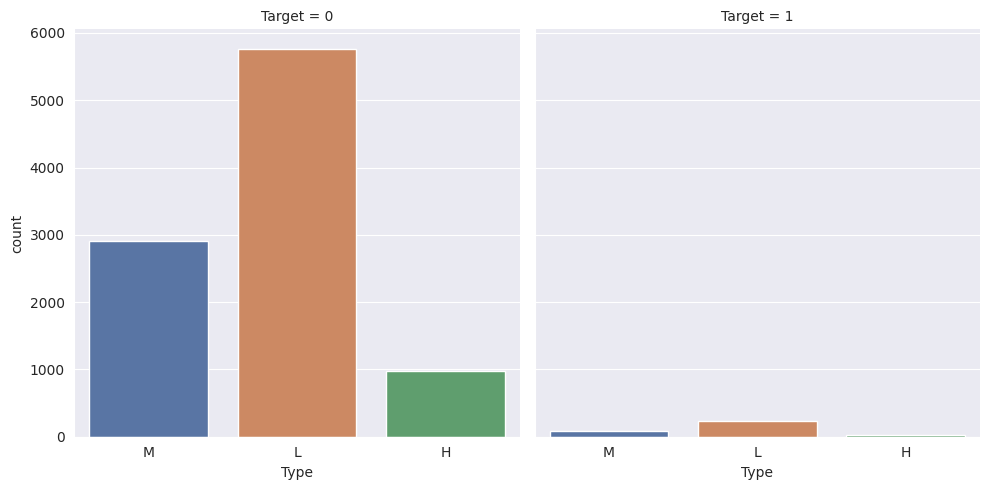

In [ ]:
graph=sns.catplot(x='Type', col='Target', kind='count', data=df)
graph.set_xticklabels(rotation=0)

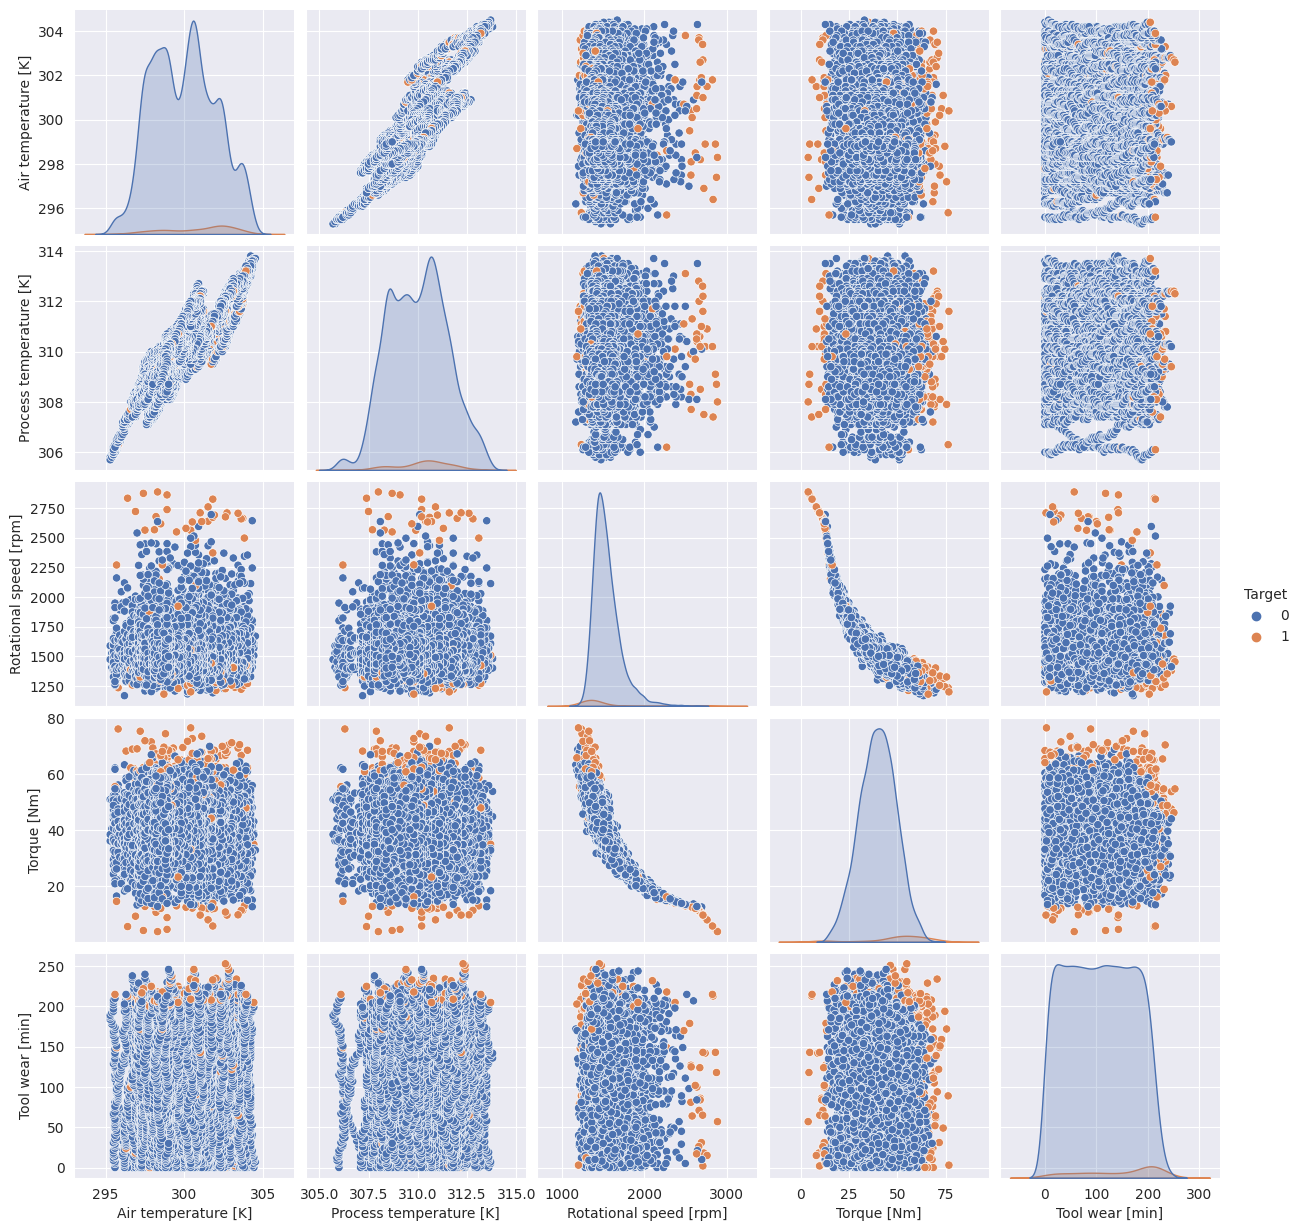

In [ ]:
sns.pairplot(df,hue='Target')

(array([ 153.,  400., 1394., 1620., 1144., 1894., 1179., 1203.,  552.,
         461.]),
 array([295.3 , 296.22, 297.14, 298.06, 298.98, 299.9 , 300.82, 301.74,
        302.66, 303.58, 304.5 ]),
 <BarContainer object of 10 artists>)

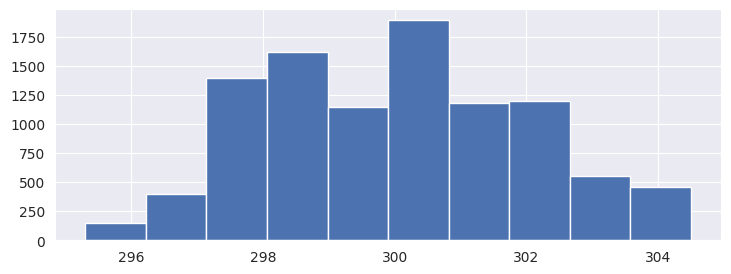

In [ ]:
plt.hist(df['Air temperature [K]'])

(array([  98.,  123.,  843., 1655., 1692., 1724., 1944., 1141.,  528.,
         252.]),
 array([305.7 , 306.51, 307.32, 308.13, 308.94, 309.75, 310.56, 311.37,
        312.18, 312.99, 313.8 ]),
 <BarContainer object of 10 artists>)

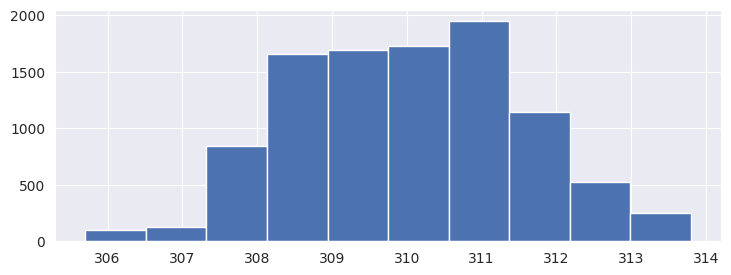

In [ ]:
plt.hist(df['Process temperature [K]'])


(array([ 602., 4650., 3227.,  987.,  336.,  102.,   45.,   21.,   22.,
           8.]),
 array([1168. , 1339.8, 1511.6, 1683.4, 1855.2, 2027. , 2198.8, 2370.6,
        2542.4, 2714.2, 2886. ]),
 <a list of 10 Patch objects>)

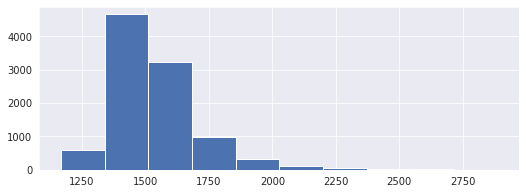

In [ ]:
plt.hist(df['Rotational speed [rpm]'])

(array([  13.,  137.,  614., 1666., 2597., 2697., 1624.,  521.,  112.,
          19.]),
 array([ 3.8 , 11.08, 18.36, 25.64, 32.92, 40.2 , 47.48, 54.76, 62.04,
        69.32, 76.6 ]),
 <a list of 10 Patch objects>)

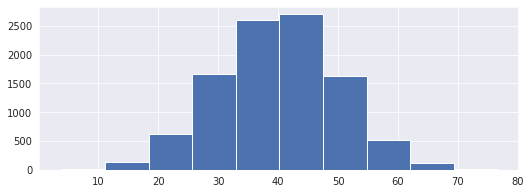

In [ ]:
plt.hist(df['Torque [Nm]'])

(array([1256., 1140., 1140., 1179., 1146., 1139., 1191., 1137.,  613.,
          59.]),
 array([  0. ,  25.3,  50.6,  75.9, 101.2, 126.5, 151.8, 177.1, 202.4,
        227.7, 253. ]),
 <a list of 10 Patch objects>)

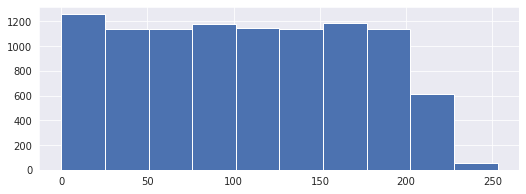

In [ ]:
plt.hist(df['Tool wear [min]'])

<Axes: >

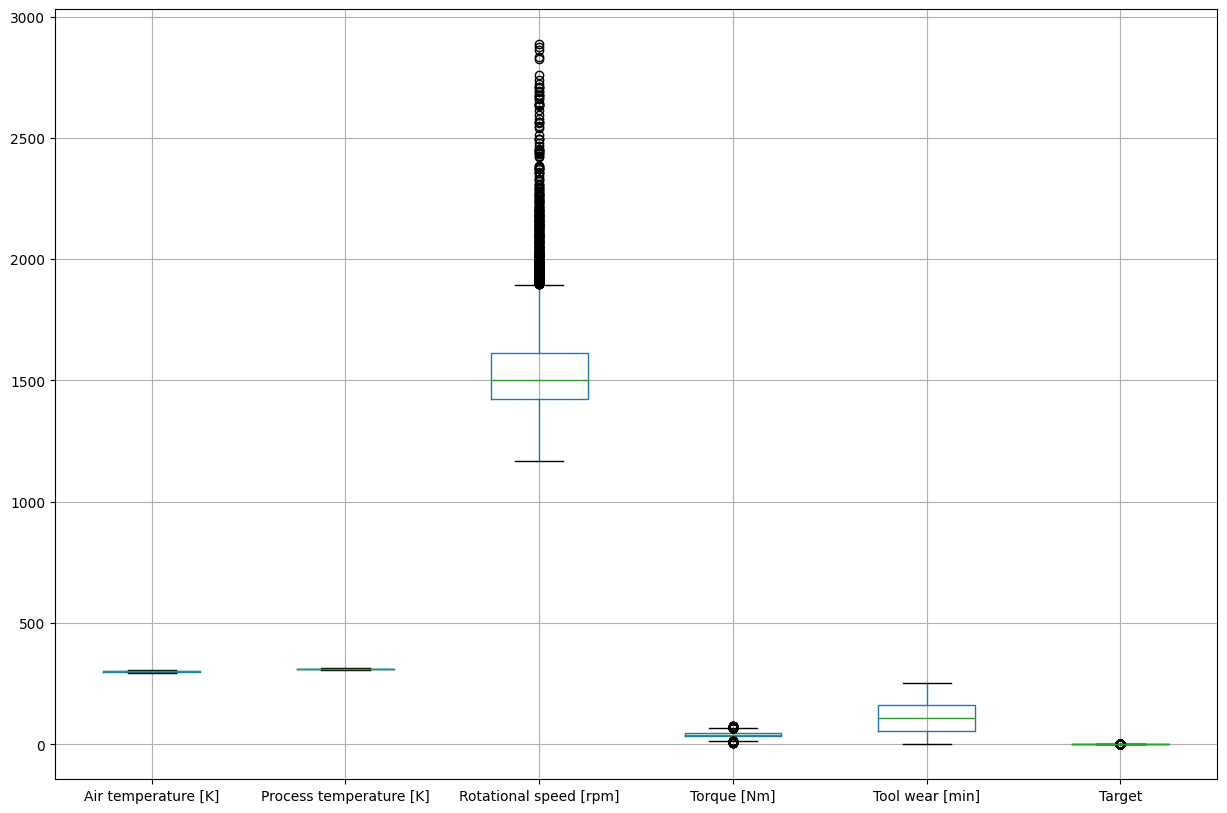

In [ ]:
df.boxplot(figsize=(15,10))


Minimum value: 1168

first quartile value: 1423.0

third quartile value: 1612.0

maximum value: 2886

interquartile range: 189.0

lower bound value: 1139.5

upper bound value: 1895.5

outliers are present in Rotational speed [rpm] attribute


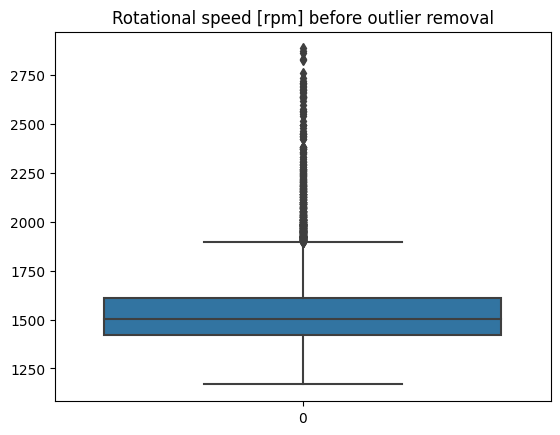

In [ ]:
sns.boxplot(df['Rotational speed [rpm]'])
plt.title('Rotational speed [rpm] before outlier removal')

sorted(df['Rotational speed [rpm]'])

xsmall=df['Rotational speed [rpm]'].min()
q1,q3=np.percentile(df['Rotational speed [rpm]'],[25,75])
xlarge=df['Rotational speed [rpm]'].max()
print('\nMinimum value:',xsmall)
print('\nfirst quartile value:',q1)
print('\nthird quartile value:',q3)
print('\nmaximum value:',xlarge)
iqr=q3-q1
print('\ninterquartile range:',iqr)
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
print('\nlower bound value:',lb)
print('\nupper bound value:',ub)
if xsmall<lb or xlarge>ub:
  print('\noutliers are present in Rotational speed [rpm] attribute')
else:
  print(f'\noutliers are not present in Rotational speed [rpm] in usd attribute')

In [ ]:
df=df[df['Rotational speed [rpm]']<ub]
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


Text(0.5, 1.0, 'Rotational speed after outlier removal')

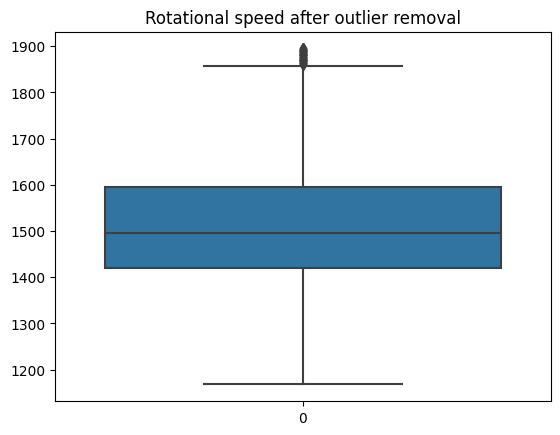

In [ ]:
sns.boxplot(df['Rotational speed [rpm]'])
plt.title('Rotational speed after outlier removal')


Minimum value: 20.1

first quartile value: 34.2

third quartile value: 47.1

maximum value: 76.6

interquartile range: 12.899999999999999

lower bound value: 14.850000000000005

upper bound value: 66.45

outliers are present in Torque [Nm] attribute


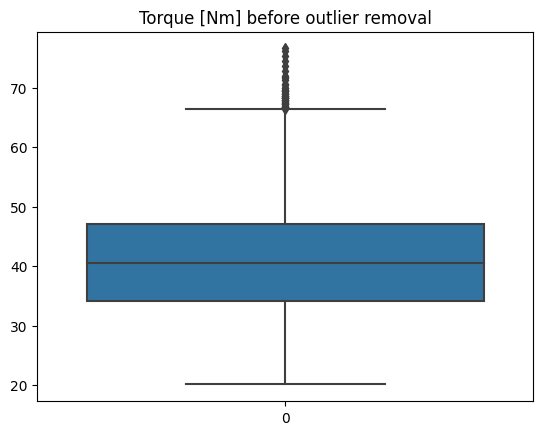

In [ ]:
sns.boxplot(df['Torque [Nm]'])
plt.title('Torque [Nm] before outlier removal')

sorted(df['Torque [Nm]'])

xsmall=df['Torque [Nm]'].min()
q1,q3=np.percentile(df['Torque [Nm]'],[25,75])
xlarge=df['Torque [Nm]'].max()
print('\nMinimum value:',xsmall)
print('\nfirst quartile value:',q1)
print('\nthird quartile value:',q3)
print('\nmaximum value:',xlarge)
iqr=q3-q1
print('\ninterquartile range:',iqr)
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)
print('\nlower bound value:',lb)
print('\nupper bound value:',ub)
if xsmall<lb or xlarge>ub:
  print('\noutliers are present in Torque [Nm] attribute')
else:
  print(f'\noutliers are not present in Torque [Nm] in usd attribute')

In [ ]:
df=df[df['Torque [Nm]']<ub]
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
df=df[df['Torque [Nm]']>lb]


Text(0.5, 1.0, 'Torque [Nm] after outlier removal')

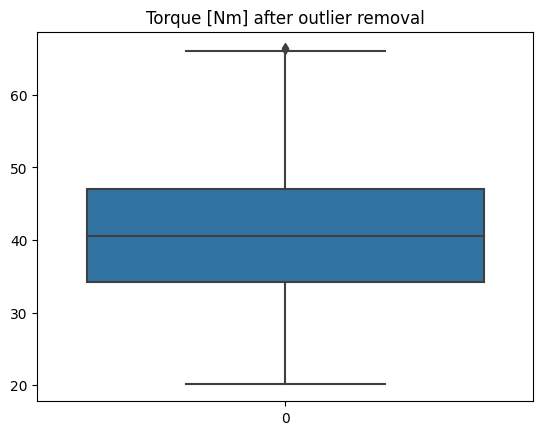

In [ ]:
sns.boxplot(df['Torque [Nm]'])
plt.title('Torque [Nm] after outlier removal')

In [ ]:
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df['Type']  = le.fit_transform(df['Type'])
df['Failure Type']  = le.fit_transform(df['Failure Type'])

#display the initial records
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,1
1,1,298.2,308.7,1408,46.3,3,0,1
2,1,298.1,308.5,1498,49.4,5,0,1
3,1,298.2,308.6,1433,39.5,7,0,1
4,1,298.2,308.7,1408,40.0,9,0,1


<Axes: >

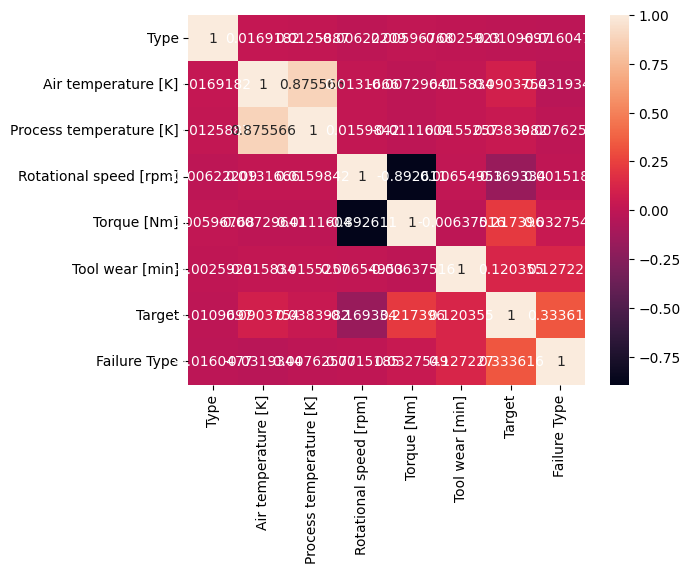

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='g')

 CLASS IMBALANCE CHECK

In [ ]:
df['Target'].value_counts()

0    9272
1     263
Name: Target, dtype: int64

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']


In [ ]:
XScaled=X.apply(zscore)
XScaled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1.332853,-0.948880,-0.945448,0.274814,0.228446,-1.699001,-0.073287
1,-0.330814,-0.898767,-0.877932,-0.827242,0.621715,-1.651815,-0.073287
2,-0.330814,-0.948880,-1.012964,-0.133640,0.970039,-1.620357,-0.073287
3,-0.330814,-0.898767,-0.945448,-0.634575,-0.142350,-1.588900,-0.073287
4,-0.330814,-0.898767,-0.877932,-0.827242,-0.086169,-1.557442,-0.073287


In [ ]:
from imblearn.over_sampling._smote.base import Counter
from imblearn.over_sampling import SMOTE
counter=Counter(y)
print('before',counter)
# Select the minority class
minority_class = y.value_counts().idxmin()

# Oversample the minority class using SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
counter=Counter(y_resampled)
print('after',counter)

before Counter({0: 9272, 1: 263})
after Counter({0: 9272, 1: 9272})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)      # 1 is just any random seed number

# Checking split of data
print('X training data size: {}'.format(X_train.shape))
print('y training data size: {}'.format(y_train.shape))
print('X testing data size:  {}'.format(X_test.shape))
print('y testing data size:  {}'.format(y_test.shape))
print("{0:0.2f}% of data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% of data is in test set".format((len(X_test)/len(df.index)) * 100))

X training data size: (12980, 7)
y training data size: (12980,)
X testing data size:  (5564, 7)
y testing data size:  (5564,)
136.13% of data is in training set
58.35% of data is in test set


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))
print(accuracy_score(y_test,log_pred))

[[2411  397]
 [ 259 2497]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      2808
           1       0.86      0.91      0.88      2756

    accuracy                           0.88      5564
   macro avg       0.88      0.88      0.88      5564
weighted avg       0.88      0.88      0.88      5564

0.8820992092020129


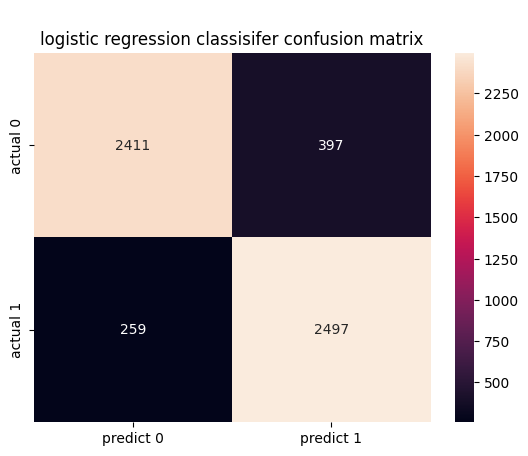

In [ ]:
cm=metrics.confusion_matrix(y_test,log_pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["actual 0","actual 1"]],
                   columns=[i for i in["predict 0","predict 1"]])
plt.title("\nlogistic regression classisifer confusion matrix")
sns.heatmap(df_cm,annot=True,fmt='g');

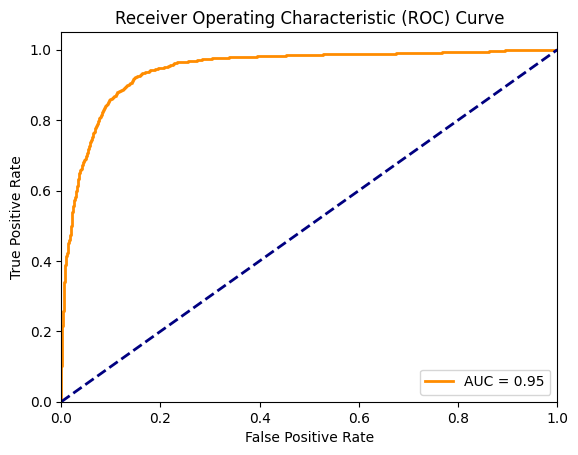

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Naive Bayes for unscaled data
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)
print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))
print(accuracy_score(y_test,gnb_pred))

[[2680  128]
 [  79 2677]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2808
           1       0.95      0.97      0.96      2756

    accuracy                           0.96      5564
   macro avg       0.96      0.96      0.96      5564
weighted avg       0.96      0.96      0.96      5564

0.9627965492451473


In [ ]:
# Naive Bayes for scaled data
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
# Model building after scaling
scaled_gnb_model = GaussianNB()
scaled_gnb_model.fit(X_train_scaled, y_train)
scaled_gnb_pred = scaled_gnb_model.predict(X_test_scaled)
print(confusion_matrix(y_test,scaled_gnb_pred))
print(classification_report(y_test,scaled_gnb_pred))
print(accuracy_score(y_test,scaled_gnb_pred))

[[2683  125]
 [  79 2677]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2808
           1       0.96      0.97      0.96      2756

    accuracy                           0.96      5564
   macro avg       0.96      0.96      0.96      5564
weighted avg       0.96      0.96      0.96      5564

0.9633357296908699


Odd Neighbors : 
 [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]

Accuracy Score : 
 [0.9444644140905823, 0.9338605319913731, 0.9272106398274622, 0.9223580158159598, 0.9164270309130123, 0.9148094895758447, 0.9126527677929547, 0.9112149532710281, 0.9086987778576564, 0.9070812365204889, 0.9060028756290438, 0.9056434219985622, 0.9031272465851905, 0.9011502516175414, 0.8986340762041697, 0.8979151689432063, 0.8968368080517614, 0.8966570812365204, 0.8952192667145938, 0.893961179007908, 0.8936017253774263, 0.8919841840402588, 0.8923436376707404, 0.8923436376707404, 0.8912652767792955, 0.8901869158878505, 0.8896477354421279, 0.8882099209202013, 0.8887491013659238, 0.8882099209202013, 0.8869518332135155, 0.8876707404744788, 0.8864126527677929, 0.8847951114306255, 0.8838964773544212, 0.8824586628324946, 0.8828181164629763, 0.8822789360172538, 0.8803019

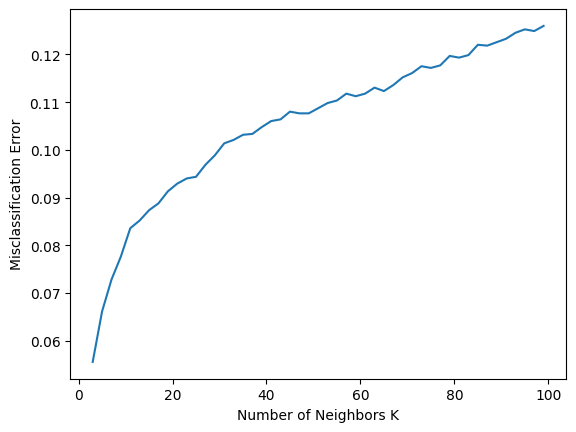

[[2542  266]
 [  43 2713]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2808
           1       0.91      0.98      0.95      2756

    accuracy                           0.94      5564
   macro avg       0.95      0.94      0.94      5564
weighted avg       0.95      0.94      0.94      5564

0.9444644140905823


In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Creating number list from range 1 to 20 of K for KNN with X_train_new, X_test_new, y_train, y_test
numberList = list(range(2,100))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones
# Declaring an empty list that will hold the accuracy scores
ac_scores = []
# performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
#predict the response
  knn.fit(X_train, y_train.values.ravel())
  y_pred = knn.predict(X_test)
#evaluate accuracy
  scores = accuracy_score(y_test, y_pred)
#insert scores to the list
  ac_scores.append(scores)
# changing to misclassification error
MSE = [1 - x for x in ac_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('Odd Neighbors : \n', neighbors)
print('\nAccuracy Score : \n', ac_scores)
print('\nMisclassification error :\n', MSE)
print("\nThe optimal number of neighbor is k=",optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
# Model building using X_train, X_test, y_train, y_test with obtained optimal_k
knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1,max_leaf_nodes=20)
dTree.fit(X_train, y_train)

# Score
print('Test score:', dTree.score(X_test, y_test))

Test score: 0.9796908698777858


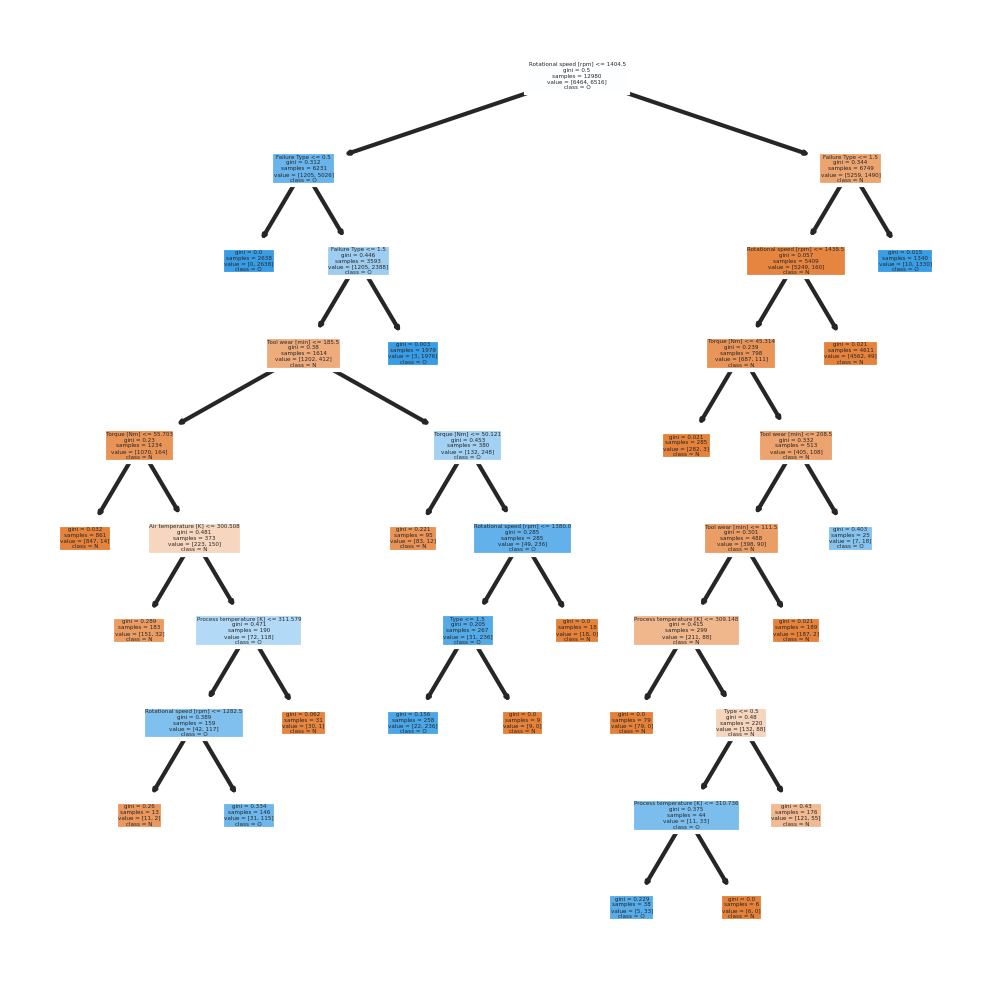

In [ ]:
# Visualizing the tree
# Max_leaf_nodes=20

from sklearn.tree import plot_tree
fn = list(X_train)
cn = ['N', 'O']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled=True)
fig.savefig('tree.png')

In [ ]:
# Feature Importance
fi=pd.DataFrame({'Feature': X_train.columns, 'Importance': dTree.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)

,Feature,Importance
0,Failure Type,0.546555
1,Rotational speed [rpm],0.376171
2,Tool wear [min],0.031192
3,Torque [Nm],0.026757
4,Process temperature [K],0.008588
5,Air temperature [K],0.006118
6,Type,0.004620


In [ ]:
X_train_new = X_train.drop(columns=['Process temperature [K]'], axis=1)
X_test_new = X_test.drop(columns=['Process temperature [K]'], axis=1)

In [ ]:
X_train_new

,Type,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
17722,1,302.400000,1349,46.183398,148,0
4038,1,302.200000,1383,46.900000,45,1
8175,2,297.400000,1627,34.300000,166,1
2017,1,299.400000,1404,47.300000,86,1
16288,1,300.332607,1292,63.741923,222,0
...,...,...,...,...,...,...
10955,0,302.251399,1356,56.743006,104,0
17289,1,299.764506,1339,59.732802,204,2
5192,1,303.100000,1514,42.100000,138,1
12172,1,301.511298,1253,64.860168,179,2


In [ ]:
X_test_new

,Type,Air temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
14188,1,299.934272,1374,59.249973,31,2
17688,1,301.128724,1635,29.933510,223,5
3223,1,301.400000,1568,35.200000,23,1
7927,1,298.800000,1529,44.000000,136,1
5197,1,302.900000,1561,34.800000,150,1
...,...,...,...,...,...,...
478,1,297.400000,1505,39.200000,209,1
1947,2,299.100000,1397,52.400000,112,1
3313,2,301.800000,1429,47.900000,53,1
13806,1,302.322167,1327,59.100186,53,0


In [ ]:
# Model building with new features
dTree = DecisionTreeClassifier(criterion = 'gini',  random_state=1)
dTree.fit(X_train_new, y_train)

# Score
print('Test score:', dTree.score(X_test_new, y_test))

Test score: 0.9892163910855499


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
#initializing random forest
rf=RandomForestClassifier()

In [ ]:
#grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
              }

grid=GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid=grid.fit(X,y)

#grid search results
print('Best grid search hyperparameters are :  '+str(model_grid.best_params_) )
print('Best grid search score is :  '+str(model_grid.best_score_) )


KeyboardInterrupt: ignored

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rs_space={'max_depth':list(np.arange(10,100,step=10)) + [None],
           'n_estimators':np.arange(10,500,step=50),
           'criterion':['gini','entropy'],
           'min_samples_leaf':randint(1,4),
           'min_samples_split':np.arange(2,10,step=2)
         }

rf_random=RandomizedSearchCV(rf,rs_space,n_iter=500,scoring='accuracy',cv=3)
model_random=rf_random.fit(X,y)

print('Best random search hyperparameters are :  '+str(model_random.best_params_) )
print('Best random search score is :  '+str(model_random.best_score_) )

Best random search hyperparameters are :  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 10}
Best random search score is :  0.9825756375732615


In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

NameError: ignored

In [ ]:
y_pred = svclassifier.predict(X_test)

NameError: ignored

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

In [ ]:
# Non Linear SVM
from sklearn.svm import SVC
# Polynomial Kernel
svclassifier = SVC(kernel='poly', degree=3)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

NameError: ignored

In [ ]:
# Gaussian Kernel (RBF)
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2190  593]
 [ 366 2501]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      2783
           1       0.81      0.87      0.84      2867

    accuracy                           0.83      5650
   macro avg       0.83      0.83      0.83      5650
weighted avg       0.83      0.83      0.83      5650

0.8302654867256637


In [ ]:
#Sigmoid Kernel
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 548 2262]
 [2161  711]]
              precision    recall  f1-score   support

           0       0.20      0.20      0.20      2810
           1       0.24      0.25      0.24      2872

    accuracy                           0.22      5682
   macro avg       0.22      0.22      0.22      5682
weighted avg       0.22      0.22      0.22      5682

0.22157690953889475


In [ ]:
model =SVC()
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.83210137 0.82365364 0.81151003 0.83051742 0.85744456 0.82470961
 0.82787751 0.81362196 0.82840549 0.82725832]
Accuracy of Model with Cross Validation is: 82.77099925195421


In [ ]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier
dTree=DecisionTreeClassifier(criterion='gini',random_state=1)
bgcl=BaggingClassifier(base_estimator=dTree,n_estimators=50,random_state=1,max_samples=.7)
bgcl=bgcl.fit(X_train,y_train)
bgcl_y_predict=bgcl.predict(X_test)
misclassified_count=(y_test!=bgcl_y_predict).sum()
print("\n missclassification samples in bagging:",misclassified_count)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



 missclassification samples in bagging: 41


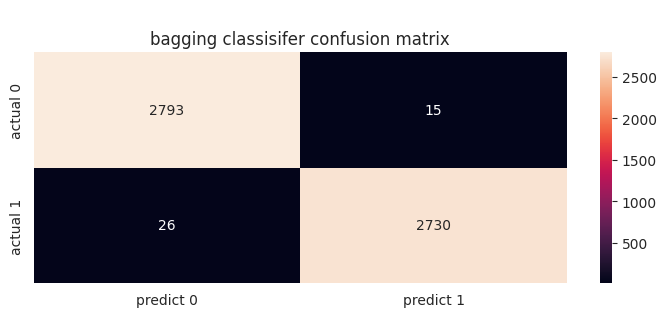

In [ ]:
cm=metrics.confusion_matrix(y_test,bgcl_y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["actual 0","actual 1"]],
                   columns=[i for i in["predict 0","predict 1"]])
plt.title("\nbagging classisifer confusion matrix")
sns.heatmap(df_cm,annot=True,fmt='g');

In [ ]:
a=accuracy_score(y_test,bgcl_y_predict)
p=precision_score(y_test,bgcl_y_predict)
r=recall_score(y_test,bgcl_y_predict)
f=f1_score(y_test,bgcl_y_predict)

print("accuracy:",round(a,2))
print("precision:",round(p,2))
print("recall:",round(r,2))
print("f1:",round(f,2))

accuracy: 0.99
precision: 0.99
recall: 0.99
f1: 0.99


In [ ]:
model =BaggingClassifier()
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.99895178 0.99895178 0.99790356 1.         0.99475891 0.99685205
 0.99895068 0.98740818 0.99895068 0.99790136]
Accuracy of Model with Cross Validation is: 99.7062899681245


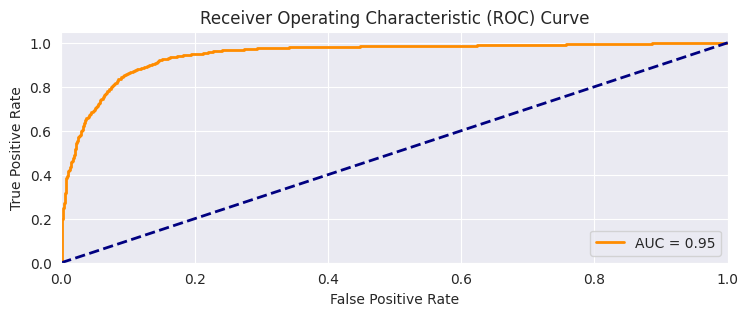

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc



# Predict probabilities for the test set
y_pred_prob1 = bgcl.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#ADA Boost
from sklearn.ensemble import AdaBoostClassifier
#Model fitting
abcl=AdaBoostClassifier(n_estimators=10,random_state=1)
abcl=abcl.fit(X_train,y_train)
#predicting for test set
abcl_y_predict=abcl.predict(X_test)
#misclassified samples
misclassified_count=(y_test!=abcl_y_predict).sum()
print("\n missclassification samples in bagging:",misclassified_count)


 missclassification samples in bagging: 198


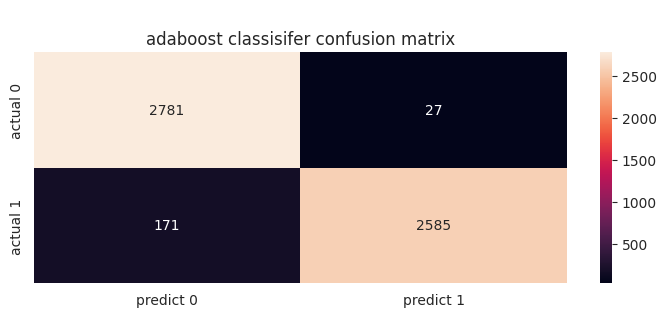

In [ ]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,abcl_y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["actual 0","actual 1"]],
                   columns=[i for i in["predict 0","predict 1"]])
plt.title("\nadaboost classisifer confusion matrix")
sns.heatmap(df_cm,annot=True,fmt='g');

In [ ]:
#performance metrics
a=accuracy_score(y_test,abcl_y_predict)
p=precision_score(y_test,abcl_y_predict)
r=recall_score(y_test,abcl_y_predict)
f=f1_score(y_test,abcl_y_predict)

print("accuracy:",round(a,2))
print("precision:",round(p,2))
print("recall:",round(r,2))
print("f1:",round(f,2))

accuracy: 0.96
precision: 0.99
recall: 0.94
f1: 0.96


In [ ]:
model =AdaBoostClassifier()
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.99895178 0.99895178 0.99895178 1.         0.99895178 1.
 0.99895068 0.99790136 0.99895068 0.99790136]
Accuracy of Model with Cross Validation is: 99.89511220222577


In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
#model fitting
gbcl=GradientBoostingClassifier(n_estimators=50,random_state=1,learning_rate=.7)
gbcl=gbcl.fit(X_train,y_train)
gbcl_y_predict=gbcl.predict(X_test)
misclassified_count=(y_test!=gbcl_y_predict).sum()
print("\n missclassification samples in bagging:",misclassified_count)


 missclassification samples in bagging: 48


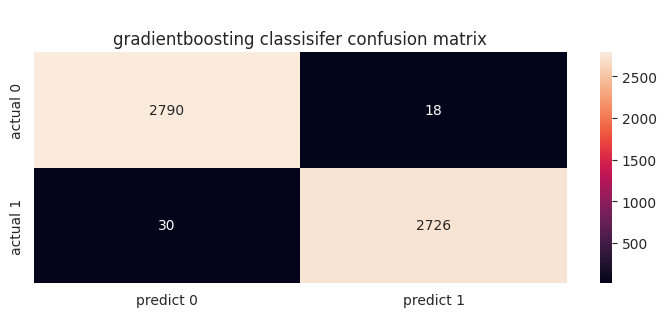

In [ ]:
#confusion matrix
cm=metrics.confusion_matrix(y_test,gbcl_y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ["actual 0","actual 1"]],
                   columns=[i for i in["predict 0","predict 1"]])
plt.title("\ngradientboosting classisifer confusion matrix")
sns.heatmap(df_cm,annot=True,fmt='g');


In [ ]:
#performance matrix
a=accuracy_score(y_test,gbcl_y_predict)
p=precision_score(y_test,gbcl_y_predict)
r=recall_score(y_test,gbcl_y_predict)
f=f1_score(y_test,gbcl_y_predict)

print("accuracy:",round(a,2))
print("precision:",round(p,2))
print("recall:",round(r,2))
print("f1:",round(f,2))

accuracy: 0.99
precision: 0.99
recall: 0.99
f1: 0.99


In [ ]:
model =GradientBoostingClassifier()
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.99580713 0.99685535 0.99895178 1.         0.98742138 0.99895068
 0.99790136 0.99160546 0.99895068 0.99790136]
Accuracy of Model with Cross Validation is: 99.64345188206283


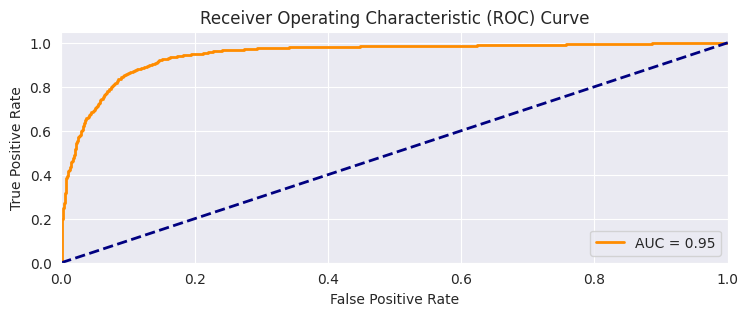

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc




# Predict probabilities for the test set
y_pred_prob2 = gbcl.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import load_iris




# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier())
]

# Define the meta-learner model
meta_learner = LogisticRegression()

# Initialize the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stacking_classifier.predict(X_test)

# Evaluate the performance of the stacking classifier
accuracy = stacking_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9940690150970525


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB





# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gnb_model', GaussianNB())
]

# Define the meta-learner model
meta_learner = KNeighborsClassifier()

# Initialize the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = stacking_classifier.predict(X_test)

# Evaluate the performance of the stacking classifier
accuracy = stacking_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.9928109273903667


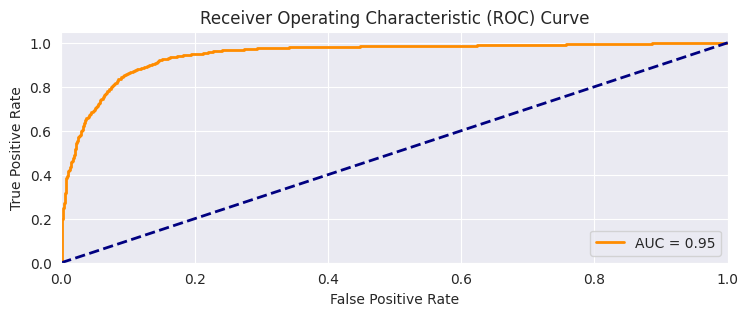

In [ ]:
# Predict probabilities for the test set
y_pred_prob2 = stacking_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
